In [4]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Load data
players_file = 'fifa_eda_stats.xlsx'
agencies_file = 'agence.xlsx'

players_df = pd.read_excel(players_file, engine='openpyxl')
df = pd.read_excel(agencies_file, engine='openpyxl')

# Check if 'Name' column is present and correctly loaded
print(players_df.columns)
print(players_df[['Name']].head())  # Should show actual player names
print(players_df['Name'].isna().sum())  # Should not be 18,207

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')
                Name
0           L. Messi
1  Cristiano Ronaldo
2          Neymar Jr
3             De Gea
4       K. De Bruyne
0


In [7]:
# Display first few rows
print("Players Data:")
print(players_df.head())
print("\nAgencies Data:")
print(df.head())
print(players_df['Name'].isna().sum())

Players Data:
       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage Preferred Foot  ...  Composure  \
0         FC Barcelona  €110.5M  €565K           Left  ...       96.0   
1             Juventus     €77M  €405K          Right  ...       95.0   
2  Paris Saint-Germain  €118.5M  €290K          Right  ...       94.0   
3    Manchester United     €72M  €260K          Right  ...       68.0   
4      Manchester City    €102M  €355K          Right  ...       88.0   

   Marking  StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
0     33.0            28.0          26.0      6.0       1

Cleaned Data:
                                     agence name  Joueurs  \
0  ISMA - International Soccer Management Agency        1   
1                                         Silvia        2   
2                                        H.Wendt        1   
3                                   Aneta Sports        1   
4                            DN Sports Solutions        3   

   Joueurs 1ère division  Valeur marchande totale  valeur joueur name joueur  
0                      0                      NaN            NaN         NaN  
1                      0                      NaN            NaN         NaN  
2                      0                      NaN            NaN         NaN  
3                      0                      NaN            NaN         NaN  
4                      0                      NaN            NaN         NaN  

Correlation Matrix:
                          Joueurs  Joueurs 1ère division  \
Joueurs                  1.000000               0.431881   
Joue

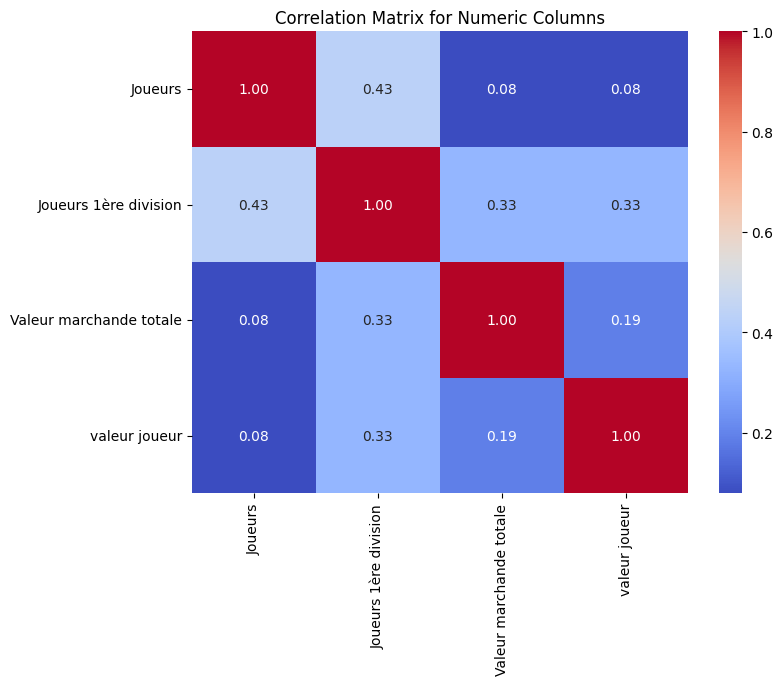

In [8]:


# Add more rows to match your dataset
# df = pd.read_excel('your_file.xlsx')  # Use this to load your actual dataset

# Data Cleaning
# Convert 'Valeur marchande totale' and 'valeur joueur' to numeric
def clean_currency(value):
    if isinstance(value, str):
        # Remove 'mio.', 'K', and '€' and replace ',' with '.'
        value = value.replace("mio.", "").replace("K", "").replace("€", "").replace(",", ".").strip()
        if value == "-":
            return np.nan  # Replace '-' with NaN
        try:
            return float(value)
        except ValueError:
            return np.nan  # Handle invalid values
    return value

# Apply the cleaning function to the relevant columns
df["Valeur marchande totale"] = df["Valeur marchande totale"].apply(clean_currency)
df["valeur joueur"] = df["valeur joueur"].apply(clean_currency)

# Check the cleaned data
print("Cleaned Data:")
print(df.head())

# Correlation Matrix
# Select only numeric columns for correlation
numeric_columns = ["Joueurs", "Joueurs 1ère division", "Valeur marchande totale", "valeur joueur"]
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Columns")
plt.show()


Missing values in Agencies Data:
agence name                   0
Joueurs                       0
Joueurs 1ère division         0
Valeur marchande totale       9
valeur joueur              1444
name joueur                  48
dtype: int64


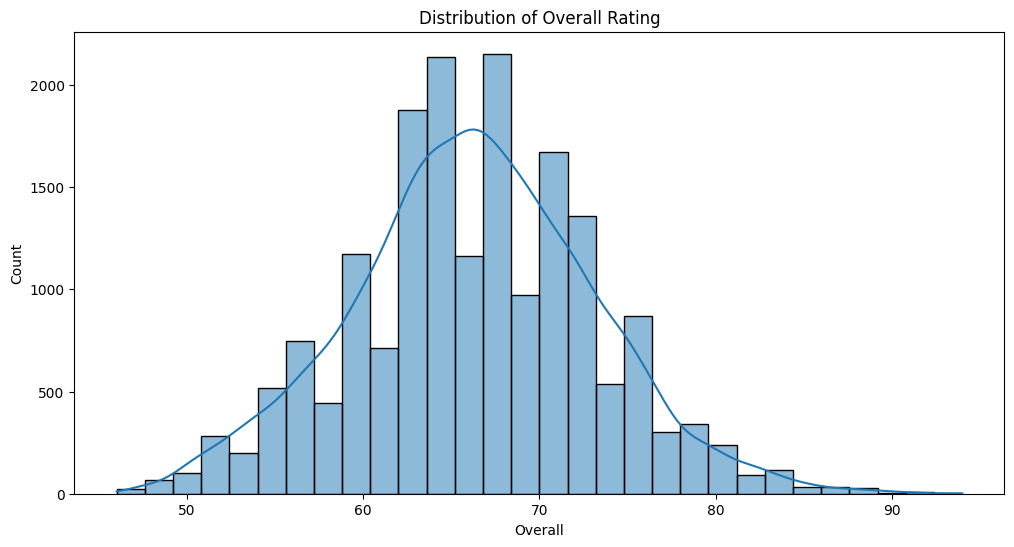

In [10]:
# Check for missing values

print("\nMissing values in Agencies Data:")
print(df.isnull().sum())



# Fill missing values for numeric columns in agencies data
numeric_cols_agencies = df.select_dtypes(include=['number']).columns
df[numeric_cols_agencies] = df[numeric_cols_agencies].fillna(df[numeric_cols_agencies].mean())

# Convert categorical data to numerical data (if necessary)
# Example: Convert 'Preferred Foot' to numerical values



# Visualize distributions of key features
plt.figure(figsize=(12, 6))
sns.histplot(players_df['Overall'], kde=True, bins=30)
plt.title('Distribution of Overall Rating')
plt.show()

# Correlation matrix


In [11]:
# Feature selection (assuming numerical player stats are relevant)
player_features = players_df.select_dtypes(include=['number']).columns
print(players_df['Name'].isna().sum())



0


In [12]:
# Scaling features
scaler = StandardScaler()
players_scaled = scaler.fit_transform(players_df[player_features])
print(players_df['Name'].isna().sum())



0


In [14]:
# Clustering agencies based on attributes (assuming we have relevant attributes for agencies)
df.fillna(0, inplace=True)  # Fill missing values with 0
agencies_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))
num_clusters = 5  # This can be tuned based on analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.select_dtypes(include=['number']))
print(players_df['Name'].isna().sum())


0


In [15]:
# Finding nearest agency for a given player
knn = NearestNeighbors(n_neighbors=1)
knn.fit(df.select_dtypes(include=['number']))
print(players_df['Name'].isna().sum())


0


In [16]:
# Function to recommend an agency
def recommend_agency(player_name):
    player_row = players_df[players_df['Name'].str.strip().str.lower() == player_name.strip().lower()]
    if player_row.empty:
        return "Player not found."
    
    player_stats = scaler.transform(player_row[player_features])
    _, agency_index = knn.kneighbors(player_stats)
    recommended_agency = agencies_df.iloc[agency_index[0][0]]
    return recommended_agency
print(players_df['Name'].isna().sum())



0


In [17]:
print(players_df.columns.tolist())
print(players_df['Name'].isna().sum())

['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']
0


In [18]:
# Example usage
player_name = 'L. Messi'  # Replace with actual player name
recommended_agency = recommend_agency(player_name)
print("Recommended Agency:")
print(recommended_agency)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Acceleration
- Age
- Aggression
- Agility
- Balance
- ...
Feature names seen at fit time, yet now missing:
- Joueurs
- Joueurs 1ère division
- Valeur marchande totale
- valeur joueur


In [ ]:
# Model Training (for classification, assuming agencies have categories)
X_train, X_test, y_train, y_test = train_test_split(players_scaled, players_df['Agency_Category'], test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

KeyError: 'Agency_Category'

In [ ]:
# Model evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Visualization
sns.pairplot(players_df[player_features[:5]])
plt.show()

In [ ]:
# Save the processed data
players_df.to_csv('/mnt/data/processed_players.csv', index=False)
df.to_csv('/mnt/data/processed_agencies.csv', index=False)
